<a href="https://colab.research.google.com/github/Cy378/PROYECTO-NFL/blob/main/MODELO_JUGADAS_NFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CARGA

In [93]:
import numpy as np
import pandas as pd

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
import pandas as pd
import glob
import os

# Ruta actualizada según tu estructura de Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/NFL Play by Play 2009-2018 (v5).csv'

# Leer el archivo CSV especificando una codificación alternativa
df = pd.read_csv(file_path,encoding='ISO-8859-1')
# Mostrar las primeras filas del DataFrame
print(df.head())

   ï»¿play_id     game_id home_team away_team posteam posteam_type defteam  \
0          46  2009091000       PIT       TEN     PIT         home     TEN   
1          68  2009091000       PIT       TEN     PIT         home     TEN   
2          92  2009091000       PIT       TEN     PIT         home     TEN   
3         113  2009091000       PIT       TEN     PIT         home     TEN   
4         139  2009091000       PIT       TEN     PIT         home     TEN   

  side_of_field  yardline_100   game_date  ...  penalty_player_id  \
0           TEN          30.0  2009-09-10  ...                NaN   
1           PIT          58.0  2009-09-10  ...                NaN   
2           PIT          53.0  2009-09-10  ...                NaN   
3           PIT          56.0  2009-09-10  ...                NaN   
4           PIT          56.0  2009-09-10  ...                NaN   

   penalty_player_name  penalty_yards replay_or_challenge  \
0                  NaN            NaN                  

In [71]:
df.replace('JAC', 'JAX', inplace=True)
df.replace('LA', 'STL', inplace=True)
df.replace('LAC', 'SD', inplace=True)


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449371 entries, 0 to 449370
Columns: 255 entries, ï»¿play_id to defensive_extra_point_conv
dtypes: float64(135), int64(18), object(102)
memory usage: 874.2+ MB


In [73]:
df.describe()

,ï»¿play_id,game_id,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,...,assist_tackle_4_team,fumble_recovery_1_yards,fumble_recovery_2_yards,return_yards,penalty_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
count,449371.000000,4.493710e+05,436301.000000,449230.000000,449206.000000,449208.000000,449371.000000,449371.000000,449371.000000,449371.000000,...,0.0,6026.000000,47.000000,449350.000000,32618.000000,449371.000000,436497.000000,436497.000000,436497.0,436497.0
mean,2140.689606,2.013620e+09,49.800658,413.968820,810.775709,1700.697033,0.017111,12.275053,0.072090,2.577696,...,NaN,2.302688,4.808511,1.042773,8.487829,0.001823,0.000069,0.000014,0.0,0.0
std,1240.303671,2.842246e+06,25.062131,279.137304,554.712205,1053.533368,0.129684,7.124626,0.258637,1.129958,...,NaN,9.066064,14.961746,5.462253,5.323953,0.042652,0.008290,0.003708,0.0,0.0
min,35.000000,2.009091e+09,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,NaN,-34.000000,-16.000000,-18.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1074.000000,2.011111e+09,31.000000,152.000000,286.000000,784.000000,0.000000,6.000000,0.000000,2.000000,...,NaN,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,2125.000000,2.013123e+09,52.000000,396.000000,797.000000,1800.000000,0.000000,12.000000,0.000000,3.000000,...,NaN,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,3180.000000,2.016103e+09,71.000000,656.000000,1288.000000,2583.000000,0.000000,18.000000,0.000000,4.000000,...,NaN,0.000000,4.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.0,0.0
max,5706.000000,2.018122e+09,99.000000,900.000000,1800.000000,3600.000000,1.000000,38.000000,1.000000,5.000000,...,NaN,93.000000,77.000000,109.000000,66.000000,1.000000,1.000000,1.000000,0.0,0.0


In [74]:
df.shape

(449371, 255)

In [75]:
df.dtypes

,0
ï»¿play_id,int64
game_id,int64
home_team,object
away_team,object
posteam,object
...,...
penalty_type,object
defensive_two_point_attempt,float64
defensive_two_point_conv,float64
defensive_extra_point_attempt,float64


In [76]:
df.columns

Index(['ï»¿play_id', 'game_id', 'home_team', 'away_team', 'posteam',
       'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_date',
       ...
       'penalty_player_id', 'penalty_player_name', 'penalty_yards',
       'replay_or_challenge', 'replay_or_challenge_result', 'penalty_type',
       'defensive_two_point_attempt', 'defensive_two_point_conv',
       'defensive_extra_point_attempt', 'defensive_extra_point_conv'],
      dtype='object', length=255)

In [77]:
df.isnull().sum()

,0
ï»¿play_id,0
game_id,0
home_team,0
away_team,0
posteam,13242
...,...
penalty_type,418232
defensive_two_point_attempt,12874
defensive_two_point_conv,12874
defensive_extra_point_attempt,12874


In [78]:
df.duplicated().sum()

np.int64(2389)

In [79]:
df.head(10)

,ï»¿play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
5,162,2009091000,PIT,TEN,TEN,away,PIT,TEN,98.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
6,183,2009091000,PIT,TEN,TEN,away,PIT,TEN,98.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
7,207,2009091000,PIT,TEN,TEN,away,PIT,TEN,94.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
8,228,2009091000,PIT,TEN,TEN,away,PIT,TEN,96.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
9,253,2009091000,PIT,TEN,PIT,home,TEN,TEN,43.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [80]:
#filtrar jugadas, sólo pass y run
df = df[df['play_type'].isin(['pass', 'run'])]

In [81]:
df.head(10)

,ï»¿play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
5,162,2009091000,PIT,TEN,TEN,away,PIT,TEN,98.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
6,183,2009091000,PIT,TEN,TEN,away,PIT,TEN,98.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
7,207,2009091000,PIT,TEN,TEN,away,PIT,TEN,94.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
9,253,2009091000,PIT,TEN,PIT,home,TEN,TEN,43.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
10,277,2009091000,PIT,TEN,PIT,home,TEN,TEN,40.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
11,301,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
12,322,2009091000,PIT,TEN,PIT,home,TEN,TEN,31.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [82]:
#Contar el numero de jugadas por tipo de jugada
print(df['play_type'].value_counts())

play_type
pass    186677
run     132692
Name: count, dtype: int64


## MODELO PARA TODOS LOS EQUIPOS

In [83]:
# Seleccionar columnas relevantes (puedes ajustar esto)
features = ['yardline_100', 'drive', 'qtr', 'down', 'ydstogo']
categoricals = ['home_team', 'away_team','posteam','posteam_type','defteam','side_of_field','game_half']
target = ['play_type']

columnas_utiles = features + categoricals + target
df = df[columnas_utiles].copy()
df.head()

,yardline_100,drive,qtr,down,ydstogo,home_team,away_team,posteam,posteam_type,defteam,side_of_field,game_half,play_type
1,58.0,1,1,1.0,10,PIT,TEN,PIT,home,TEN,PIT,Half1,pass
2,53.0,1,1,2.0,5,PIT,TEN,PIT,home,TEN,PIT,Half1,run
3,56.0,1,1,3.0,8,PIT,TEN,PIT,home,TEN,PIT,Half1,pass
5,98.0,2,1,1.0,10,PIT,TEN,TEN,away,PIT,TEN,Half1,run
6,98.0,2,1,2.0,10,PIT,TEN,TEN,away,PIT,TEN,Half1,pass


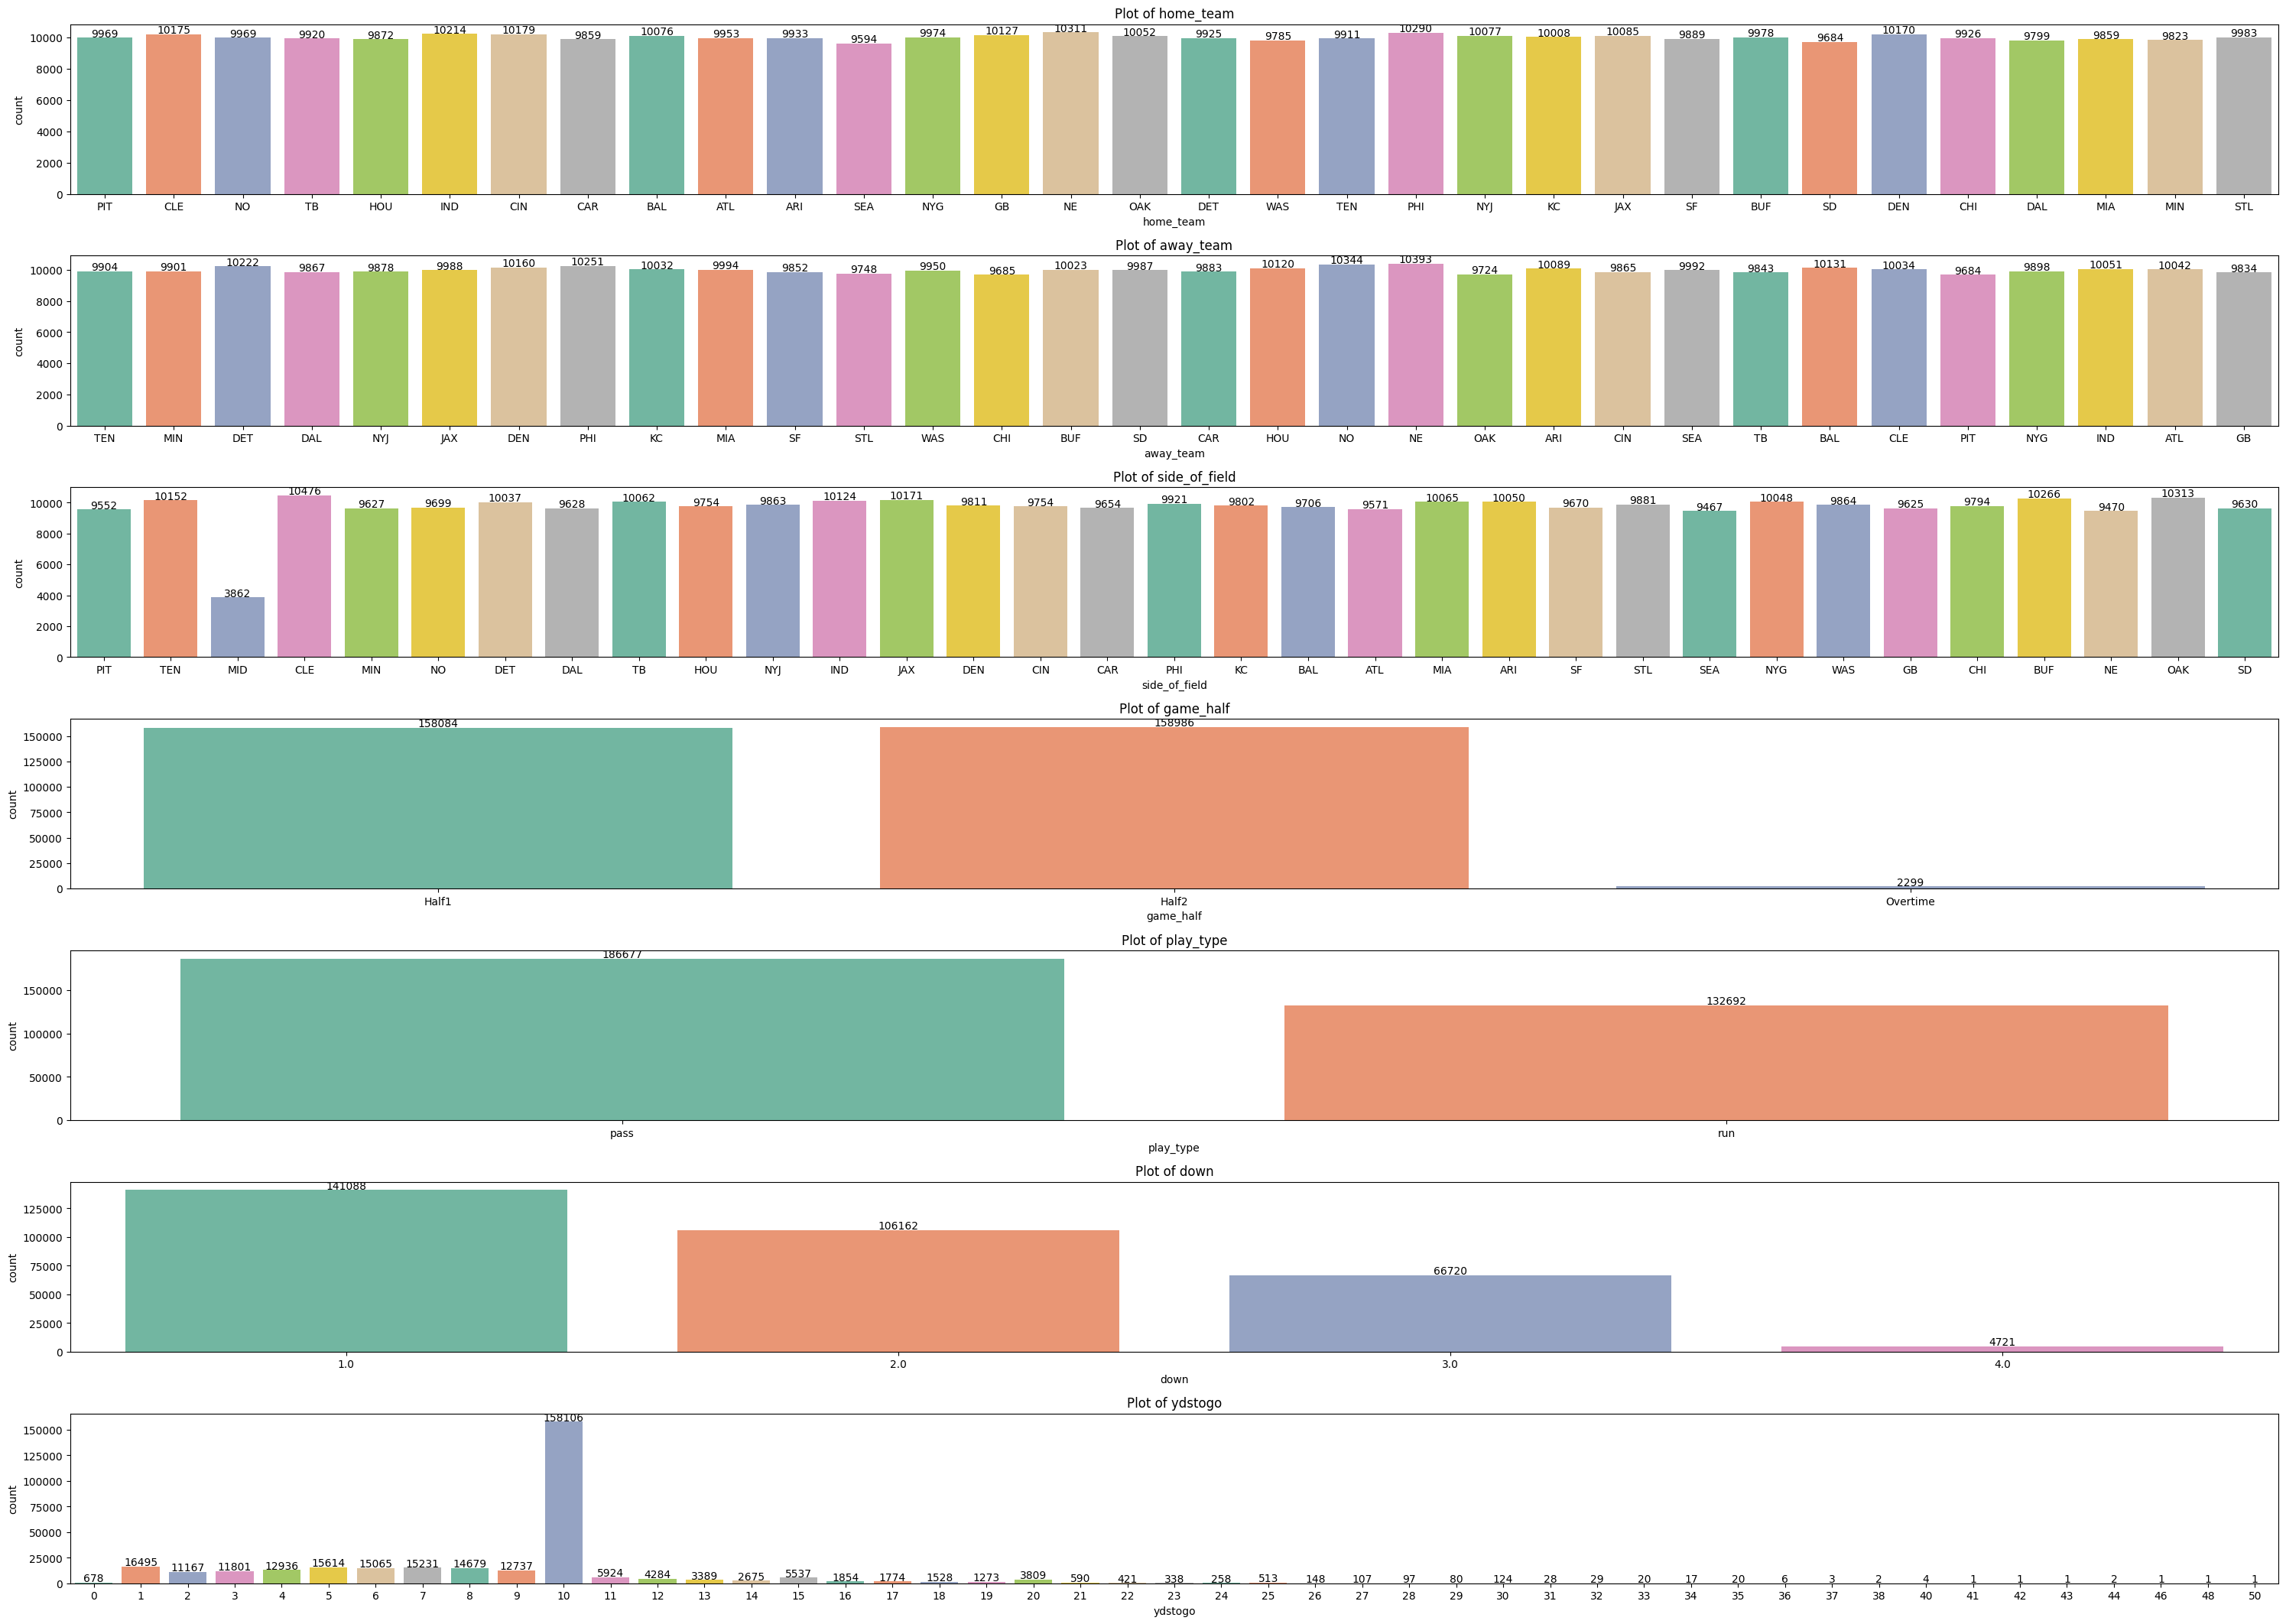

In [84]:
def create_plot(ax, x, data, plot_type='count', y=None, palette='Set2'):
    if plot_type == 'count':
        sns.countplot(x=x, data=data, palette=palette, ax=ax)
    elif plot_type == 'bar':
        sns.barplot(x=x, y=y, data=data, palette=palette, ax=ax)

    ax.set_title(f'Plot of {x}' if plot_type == 'count' else f'Bar Plot of {x} and {y}')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline',
                    fontsize=10, color='black',
                    xytext=(0, 1),
                    textcoords='offset points')

# Create the figure and subplots
plt.figure(figsize=(30, 30))

# Define plot configurations
plot_configs = [
    {'x': 'home_team', 'data': df, 'plot_type': 'count'},
    {'x': 'away_team', 'data': df, 'plot_type': 'count'},
    {'x': 'side_of_field', 'data': df, 'plot_type': 'count'},
    {'x': 'game_half', 'data': df, 'plot_type': 'count'},
    {'x': 'play_type', 'data': df, 'plot_type': 'count'},
    {'x': 'down', 'data': df, 'plot_type': 'count'},
    {'x': 'ydstogo', 'data': df, 'plot_type': 'count'},
]

# Loop through plot configurations to create subplots
for i, config in enumerate(plot_configs):
    ax = plt.subplot(10, 1, i + 1)
    create_plot(ax, **config)

plt.tight_layout()
plt.show()

In [ ]:
## Checking outiers detection through box plot.
plt.figure(figsize=(5, 5))
sns.boxplot(y='ydstogo', data=df)
plt.title('Boxplot of play type by game half')
plt.show()

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
## we need to encode them for better prediction.

labelled_encoder_game_half = LabelEncoder()
labelled_encoder_side = LabelEncoder()
labelled_encoder_home_team = LabelEncoder()
labelled_encoder_away_team = LabelEncoder()
labelled_encoder_posteam = LabelEncoder()
labelled_encoder_posteam_type = LabelEncoder()
labelled_encoder_defteam = LabelEncoder()


X['game_half'] = labelled_encoder_game_half.fit_transform(X['game_half'])
X['side_of_field'] = labelled_encoder_side.fit_transform(X['side_of_field'])
X['home_team'] = labelled_encoder_home_team.fit_transform(X['home_team'])
X['away_team'] = labelled_encoder_away_team.fit_transform(X['away_team'])
X['posteam'] = labelled_encoder_posteam.fit_transform(X['posteam'].astype(str))
X['posteam_type'] = labelled_encoder_posteam_type.fit_transform(X['posteam_type'].astype(str))
X['defteam'] = labelled_encoder_defteam.fit_transform(X['defteam'].astype(str))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
accuracy = dtc.score(X_test,y_test)
print('The accuaracy of this model is :', accuracy*100)

In [ ]:
unique_classes

In [ ]:
from sklearn.tree import plot_tree
unique_classes = np.unique(y_train)
plt.figure(figsize=(20,10))
plot_tree(dtc, class_names=unique_classes, filled=True)
plt.show()

In [ ]:
df.sample(1)

In [ ]:
## Prediction
X = np.array(['33','13','3','1', '10','PIT','CIN','CIN','away','PIT','PIT','Half2'])
label = LabelEncoder()
X = label.fit_transform(X)
y_pred = dtc.predict(X.reshape(1,-1))
y_pred

## MODELO DE PREDICCIÓN PARA JUGADAS DE OAKLAND

In [85]:
# Seleccionar columnas relevantes (puedes ajustar esto)
features = ['yardline_100', 'drive', 'qtr', 'down', 'ydstogo']
categoricals = ['home_team', 'away_team','posteam','posteam_type','defteam','side_of_field','game_half']
target = ['play_type']

columnas_utiles = features + categoricals + target
df = df[columnas_utiles].copy()
df.head()

,yardline_100,drive,qtr,down,ydstogo,home_team,away_team,posteam,posteam_type,defteam,side_of_field,game_half,play_type
1,58.0,1,1,1.0,10,PIT,TEN,PIT,home,TEN,PIT,Half1,pass
2,53.0,1,1,2.0,5,PIT,TEN,PIT,home,TEN,PIT,Half1,run
3,56.0,1,1,3.0,8,PIT,TEN,PIT,home,TEN,PIT,Half1,pass
5,98.0,2,1,1.0,10,PIT,TEN,TEN,away,PIT,TEN,Half1,run
6,98.0,2,1,2.0,10,PIT,TEN,TEN,away,PIT,TEN,Half1,pass


In [89]:
# Variables a usar
features = ['yardline_100', 'drive', 'qtr', 'down', 'ydstogo']
categoricals = ['home_team', 'away_team', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'game_half']
target = ['play_type']

# Filtrar jugadas de partidos con OAK
oak_df = df[(df['home_team'] == 'OAK') | (df['away_team'] == 'SD')].copy()

# Eliminar jugadas sin tipo válido
oak_df = oak_df[oak_df['play_type'].isin(['pass', 'run'])]

# Codificar variables categóricas y target
oak_encoded = pd.get_dummies(oak_df[features + categoricals + target], drop_first=True)

# Identificar la columna target codificada (ej: play_type_run o play_type_pass)
target_cols = [col for col in oak_encoded.columns if col.startswith('play_type_')]
if len(target_cols) != 1:
    raise ValueError("No se encontró una única columna de target después del one-hot encoding.")
target_col = target_cols[0]

# Dividir datos
X = oak_encoded.drop(columns=[target_col])
y = oak_encoded[target_col]

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Entrenar el modelo
model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)
model.fit(X_train, y_train)

# Evaluar
y_pred = model.predict(X_test)
print("\n📊 Clasificación para jugadas con OAK como local o visitante:\n")
print(classification_report(y_test, y_pred))



📊 Clasificación para jugadas con OAK como local o visitante:

              precision    recall  f1-score   support

       False       0.69      0.69      0.69      3283
        True       0.56      0.55      0.56      2327

    accuracy                           0.64      5610
   macro avg       0.62      0.62      0.62      5610
weighted avg       0.64      0.64      0.64      5610



Jugadas oak vs sd

In [90]:
oak_vs_sd_df = df[
    (df['home_team'] == 'OAK') &
    (df['away_team'] == 'SD') &
    (df['posteam'] == 'OAK') &
    (df['play_type'].isin(['run', 'pass']))
].copy()


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Columnas
features = ['yardline_100', 'drive', 'qtr', 'down', 'ydstogo']
categoricals = ['home_team', 'away_team', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'game_half']

# Filtrar jugadas específicas
oak_vs_sd_df = df[
    (df['home_team'] == 'OAK') &
    (df['away_team'] == 'SD') &
    (df['posteam'] == 'OAK') &
    (df['play_type'].isin(['run', 'pass']))
].copy()

# Asegurarse de que hay suficientes jugadas
if oak_vs_sd_df.shape[0] < 20:
    print(f"⚠️ Muy pocas jugadas entre OAK (local) y SD (visita) para entrenar un modelo confiable.")
else:
    # One-hot encoding
    encoded = pd.get_dummies(oak_vs_sd_df[features + categoricals + ['play_type']], drop_first=True)

    # Detectar columna objetivo
    target_cols = [col for col in encoded.columns if col.startswith('play_type_')]
    if len(target_cols) != 1:
        raise ValueError("No se encontró una única columna target.")
    target_col = target_cols[0]

    X = encoded.drop(columns=[target_col])
    y = encoded[target_col]

    # Entrenar modelo
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

    model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Reporte
    print("\n📊 Resultados para OAK (local) vs SD (visita), solo ofensiva de OAK:\n")
    print(classification_report(y_test, y_pred))
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy del modelo: {acc:.3f}")



📊 Resultados para OAK (local) vs SD (visita), solo ofensiva de OAK:

              precision    recall  f1-score   support

       False       0.65      0.72      0.69       123
        True       0.48      0.41      0.44        79

    accuracy                           0.60       202
   macro avg       0.57      0.56      0.56       202
weighted avg       0.59      0.60      0.59       202

✅ Accuracy del modelo: 0.599


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Columnas que usarás
features = ['yardline_100', 'drive', 'qtr', 'down', 'ydstogo']
categoricals = ['home_team', 'away_team', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'game_half']

# Filtrar dataset: solo jugadas donde OAK es local, SD es visitante, y OAK está a la ofensiva
oak_vs_sd_df = df[
    (df['home_team'] == 'OAK') &
    (df['away_team'] == 'SD') &
    (df['posteam'] == 'OAK') &
    (df['play_type'].isin(['run', 'pass']))
].copy()

# Verificar que hay suficientes jugadas
if oak_vs_sd_df.shape[0] < 20:
    print("⚠️ Muy pocas jugadas para entrenar un modelo confiable.")
else:
    # One-hot encoding
    encoded = pd.get_dummies(oak_vs_sd_df[features + categoricals + ['play_type']], drop_first=True)

    # Identificar columna objetivo
    target_cols = [col for col in encoded.columns if col.startswith('play_type_')]
    if len(target_cols) != 1:
        raise ValueError("No se encontró una única columna target.")
    target_col = target_cols[0]

    X = encoded.drop(columns=[target_col])
    y = encoded[target_col]

    # Split de datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

    # Modelo Random Forest
    rf_model = RandomForestClassifier(
        n_estimators=20,
        max_depth=8,
        random_state=42
    )
    rf_model.fit(X_train, y_train)

    # Predicciones
    y_pred = rf_model.predict(X_test)

    # Evaluación
    print("\n🌲 Resultados del modelo Random Forest (20 árboles, profundidad 8):\n")
    print(classification_report(y_test, y_pred))
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy del modelo: {acc:.3f}")



🌲 Resultados del modelo Random Forest (20 árboles, profundidad 8):

              precision    recall  f1-score   support

       False       0.66      0.71      0.68       123
        True       0.49      0.43      0.46        79

    accuracy                           0.60       202
   macro avg       0.57      0.57      0.57       202
weighted avg       0.59      0.60      0.59       202

✅ Accuracy del modelo: 0.599
